In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python3 -m venv /content/drive/MyDrive/TFG_Miquel/donut_env

In [2]:
import os
import sys
current_working_directory = os.getcwd()
print("Current Directory:", current_working_directory)

Current Directory: /content/drive/My Drive/TFG_Miquel


In [3]:
folder_path = '/MyDrive/TFG_Miquel/donut'
sys.path.append(folder_path)
os.chdir('./donut')
current_working_directory = os.getcwd()
print("Current Working Directory changed to:", current_working_directory)


# Transformer 4.11.3
!pip install "transformers==4.38.2" \
        "timm==0.6.13" \
        "datasets[vision]" \
        "pytorch-lightning>=1.6.4" \
        "nltk" \
        "sentencepiece" \
        "zss" \
        "sconf>=0.2.3" \
        "datasets" \
         "sentence-transformers==2.2.2"

import matplotlib.pyplot as plt
import json
from datasets import load_dataset
import argparse

def join_folder_path(relative, absolute = folder_path):
  """
  Joins a relative folder path to an absolute folder path.
  :param relative: The relative path to be joined to the base folder path.
  :param absolute: The base absolute folder path (default is 'folder_path').
  :return: The absolute path formed by combining the base folder and relative path.
  """
  return os.path.abspath(
    os.path.join(
      folder_path, # Absolute rute for google colab
      relative # Relative to 'donut'
    )
  )

%load_ext autoreload
%autoreload 2

Current Working Directory changed to: /content/drive/My Drive/TFG_Miquel/donut


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 25.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 109.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.5 MB/s eta 0:00:0000:010:01
   

# Show dataset images

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


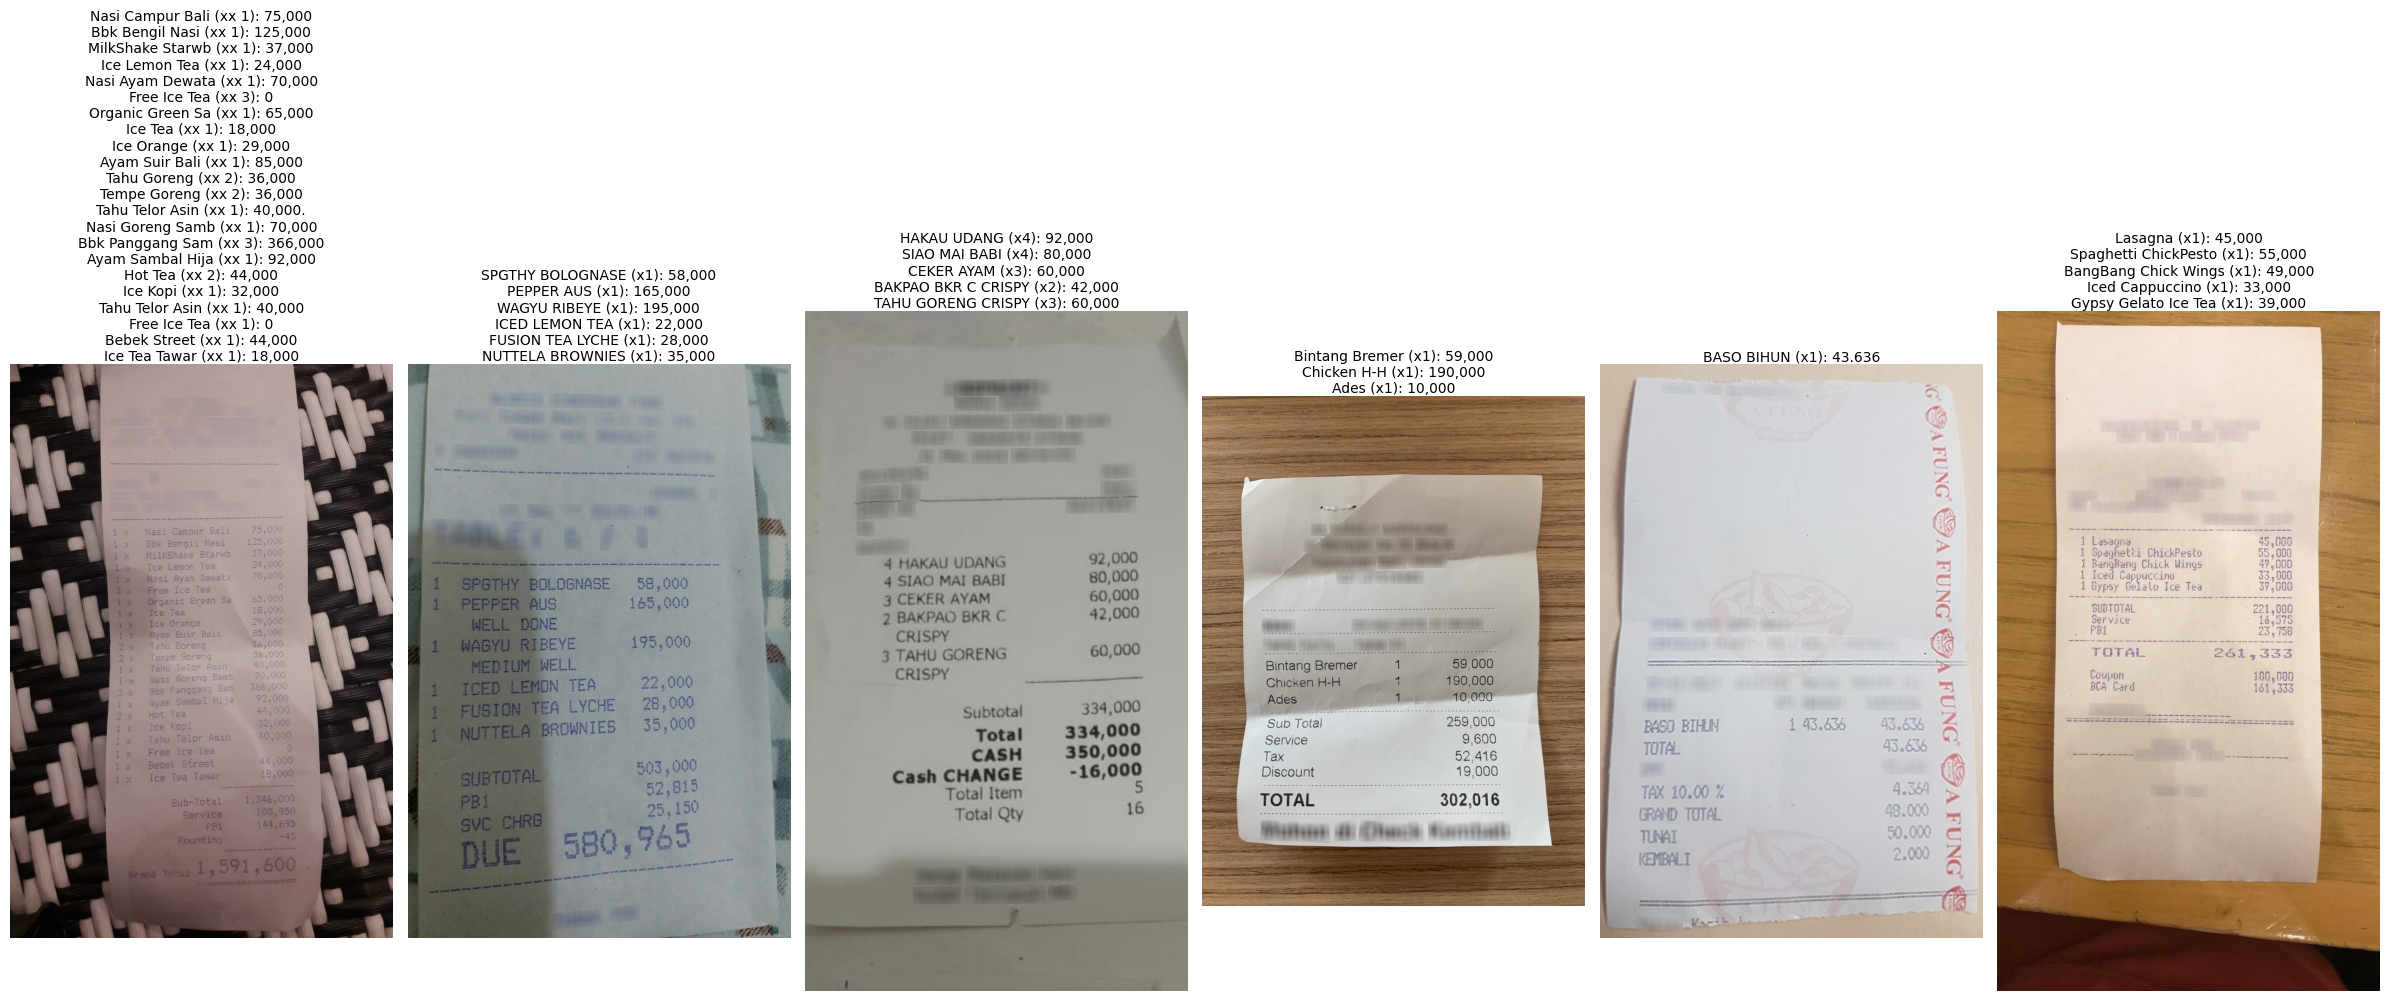

In [7]:
ds = load_dataset("naver-clova-ix/cord-v1", split="train")
# ds = load_dataset("./dataset/new_generated_images", split="train")

def show_samples(dataset, num_samples=3):
    fig, axes = plt.subplots(1, num_samples, figsize=(num_samples * 4, 10))

    for i in range(num_samples):
        sample = dataset[i]
        img = sample["image"]
        gt = json.loads(sample["ground_truth"])

        # Extract relevant text from ground truth
        menu_items = gt["gt_parse"]["menu"]
        if not isinstance(menu_items, list):
          menu_items = [menu_items] #In case it is just a single product
        formatted_text = "\n".join([f"{item['nm']} (x{item['cnt']}): {item['price']}" for item in menu_items])

        # Add text to the images
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(formatted_text, fontsize=10, loc="center", pad=0)

    plt.tight_layout()
    plt.show()

show_samples(ds, num_samples=6)


# Test an already trained model

In [25]:
from test_model import test

"""
python test.py  --dataset_name_or_path naver-clova-ix/cord-v2 \
                --pretrained_model_name_or_path ./result/train_cord/test_experiment \
                --save_path ./result/output.json
"""

def parse_args_test():
    parser = argparse.ArgumentParser()
    parser.add_argument("--pretrained_model_name_or_path", type=str)
    parser.add_argument("--dataset_name_or_path", type=str)
    parser.add_argument("--split", type=str, default="test")
    parser.add_argument("--task_name", type=str, default="")
    parser.add_argument("--save_path", type=str, default=None)
    args, left_argv = parser.parse_known_args()

    if args.task_name is None:
        args.task_name = os.path.basename(args.dataset_name_or_path)

    return args

args = parse_args_test()

# Simulate the command-line inputs
dataset_path = 'dataset/new_generated_images/'#join_folder_path('dataset/new_generated_images/')
result_test_path = "result/testing/output.json"#join_folder_path("result/testing/output.json")

args.dataset_name_or_path = dataset_path #"naver-clova-ix/cord-v1" #
args.pretrained_model_name_or_path = "naver-clova-ix/donut-base-finetuned-cord-v2"
args.save_path = result_test_path

test(args)

Resolving data files:   0%|          | 0/89 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

  0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:453: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
100%|██████████| 5/5 [04:43<00:00, 56.80s/it]


Total number of samples: 5, Tree Edit Distance (TED) based accuracy score: 0.0, F1 accuracy score: 0.0


[{'text_sequence': '>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> drainst pa> based inte head into ref ref ref ref lately drain se fate <sep/> breath are a safari aspairs ble ul ds sef el岛 al site ds sef el岛 al fish are aljubele ul ds al fish are aljubele ds, Bi ul sion eld site al site al site al site al site al fish are asses all navig po se fol town to ba u es are apol al fish lowing appl es al fish lowald ica plant al fish po se fol town to lei al fish bo bo bo bo bo bo bo bo ds po se lowing appl al fish sion ds po se fol bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi bendi ben

# Train base model

In [ ]:
from train import train
from sconf import Config

"""
python train.py --config config/train_cord.yaml \
                --pretrained_model_name_or_path "naver-clova-ix/donut-base" \
                --dataset_name_or_paths '["naver-clova-ix/cord-v2"]' \
                --exp_version "test_experiment"
"""

dataset_path = 'dataset/new_generated_images/'# join_folder_path('dataset/new_generated_images/')
conf_path = 'config/train_cord.yaml' #join_folder_path('config/train_cord.yaml')
result_train_path = 'result/training/' #join_folder_path('result/training/')

def parse_args_train():
    parser = argparse.ArgumentParser()
    parser.add_argument(
      "--config", type=str, required=False,
      default=conf_path
    )
    parser.add_argument(
      "--pretrained_model_name_or_path", type=str, required=False,
      default="naver-clova-ix/donut-base"
    )
    parser.add_argument(
      "--dataset_name_or_path", type=str, required=False,
      default= f"[{dataset_path}]" #"['naver-clova-ix/cord-v1']"
    )
    parser.add_argument(
      "--exp_version", type=str, required=False,
      default="test_experiment"
    )
    parser.add_argument(
      "--exp_name", type=str, required=False,
      default="test_experiment"
    )
    parser.add_argument(
      "--result_path", type=str, required=False,
      default=result_train_path
    )

    parser.add_argument("--task_name", type=str, default="")
    args, left_argv = parser.parse_known_args()

    if args.task_name is None:
        args.task_name = os.path.basename(args.dataset_name_or_path)

    return args

args = parse_args_train()

config = Config(args.config)
for k, v in vars(args).items():
    config[k] = v

# args.config = 'config/train_cord.yaml'
# args.pretrained_model_name_or_path = "naver-clova-ix/donut-base"
# args.dataset_name_or_path =  f'["{dataset_path}"]' #"['naver-clova-ix/cord-v1']"
# args.exp_version = "test_experiment"


train(config)

INFO:lightning_fabric.utilities.seed:Seed set to 2022
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/358 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


tokenizer_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/71.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/355 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.01M [00:00<?, ?B/s]

Some weights of DonutModel were not initialized from the model checkpoint at naver-clova-ix/donut-base and are newly initialized because the shapes did not match:
- encoder.model.layers.0.blocks.1.attn_mask: found shape torch.Size([3072, 100, 100]) in the checkpoint and torch.Size([768, 100, 100]) in the model instantiated
- encoder.model.layers.1.blocks.1.attn_mask: found shape torch.Size([768, 100, 100]) in the checkpoint and torch.Size([192, 100, 100]) in the model instantiated
- encoder.model.layers.2.blocks.1.attn_mask: found shape torch.Size([192, 100, 100]) in the checkpoint and torch.Size([48, 100, 100]) in the model instantiated
- encoder.model.layers.2.blocks.3.attn_mask: found shape torch.Size([192, 100, 100]) in the checkpoint and torch.Size([48, 100, 100]) in the model instantiated
- encoder.model.layers.2.blocks.5.attn_mask: found shape torch.Size([192, 100, 100]) in the checkpoint and torch.Size([48, 100, 100]) in the model instantiated
- encoder.model.layers.2.blocks.7.

Resolving data files:   0%|          | 0/89 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Sampling from the dataset
 - 0: 0.0001s. Estimated:0.0086s
 - 1: 0.0001s. Estimated:0.0068s
 - 2: 0.0002s. Estimated:0.0097s
 - 3: 0.0001s. Estimated:0.0085s
 - 4: 0.0001s. Estimated:0.0077s
 - 5: 0.0001s. Estimated:0.0071s
 - 6: 0.0001s. Estimated:0.0067s
 - 7: 0.0001s. Estimated:0.0065s
 - 8: 0.0001s. Estimated:0.0061s
 - 9: 0.0001s. Estimated:0.0059s
 - 10: 0.0001s. Estimated:0.0056s
 - 11: 0.0000s. Estimated:0.0054s
 - 12: 0.0001s. Estimated:0.0052s
 - 13: 0.0001s. Estimated:0.0050s
 - 14: 0.0001s. Estimated:0.0049s
 - 15: 0.0001s. Estimated:0.0049s
 - 16: 0.0001s. Estimated:0.0047s
 - 17: 0.0001s. Estimated:0.0046s
 - 18: 0.0000s. Estimated:0.0045s
 - 19: 0.0000s. Estimated:0.0044s
 - 20: 0.0001s. Estimated:0.0043s
 - 21: 0.0001s. Estimated:0.0042s
 - 22: 0.0000s. Estimated:0.0040s
 - 23: 0.0001s. Estimated:0.0040s
 - 24: 0.0001s. Estimated:0.0039s
 - 25: 0.0001s. Estimated:0.0038s
 - 26: 0.0001s. Estimated:0.0038s
 - 27: 0.0001s. Estimated:0.0037s
 - 28: 0.0001s. Estimated:0.0036

Resolving data files:   0%|          | 0/89 [00:00<?, ?it/s]

Sampling from the dataset
 - 0: 0.0001s. Estimated:0.0003s
 - 1: 0.0001s. Estimated:0.0003s
 - 2: 0.0001s. Estimated:0.0002s
 - 3: 0.0001s. Estimated:0.0002s
 - 4: 0.0001s. Estimated:0.0001s
 - 5: 0.0001s. Estimated:0.0001s


/usr/local/lib/python3.11/dist-packages/lightning_fabric/connector.py:572: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)


 - 6: 0.0001s. Estimated:0.0000s


MisconfigurationException: `Trainer(strategy='ddp')` is not compatible with an interactive environment. Run your code as a script, or choose a notebook-compatible strategy: `Trainer(strategy='ddp_notebook')`. In case you are spawning processes yourself, make sure to include the Trainer creation inside the worker function.